In [1]:
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy
import scipy.stats as stats

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.ticker as tck

import pandas as pd
import pickle

In [2]:
"""
batman + GP model w raw flux

"""

'\nbatman + GP model w raw flux\n\n'

In [3]:
filename = r"C:\Users\Student\OneDrive\MSci project\MSci2022_TESS\Transit_fitting\WASP_17b\gp_batman_model\WASP_17b_residuals_gp_batman_w_flux.p"

with open(filename, "rb") as f:
    WASP_17b_t, WASP_17b_residuals = pickle.load(f)
f.close()

In [4]:
filename = r"C:\Users\Student\OneDrive\MSci project\MSci2022_TESS\Transit_fitting\WASP_39b\gp_batman_model\WASP_39b_residuals_gp_batman_w_flux.p"

with open(filename, "rb") as f:
    WASP_39b_t, WASP_39b_residuals = pickle.load(f)
f.close()

In [5]:
filename = r"C:\Users\Student\OneDrive\MSci project\MSci2022_TESS\Transit_fitting\HAT_P_26b\gp_batman_model\free_ecc\HAT_P_26b_residuals_gp_batman_w_flux.p"

with open(filename, "rb") as f:
    HAT_P_26b_t, HAT_P_26b_residuals = pickle.load(f)
f.close()

In [6]:
filename = r"C:\Users\Student\OneDrive\MSci project\MSci2022_TESS\Transit_fitting\HAT_P_32b\gp_batman_model\free_ecc\HAT_P_32b_residuals_gp_batman_w_flux.p"

with open(filename, "rb") as f:
    HAT_P_32b_t, HAT_P_32b_residuals = pickle.load(f)
f.close()

In [7]:
WASP_17b_residuals_mean = np.mean(WASP_17b_residuals)
WASP_17b_residuals_sigma = np.std(WASP_17b_residuals)

WASP_39b_residuals_mean = np.mean(WASP_39b_residuals)
WASP_39b_residuals_sigma = np.std(WASP_39b_residuals)

HAT_P_26b_residuals_mean = np.mean(HAT_P_26b_residuals)
HAT_P_26b_residuals_sigma = np.std(HAT_P_26b_residuals)

HAT_P_32b_residuals_mean = np.mean(HAT_P_32b_residuals)
HAT_P_32b_residuals_sigma = np.std(HAT_P_32b_residuals)


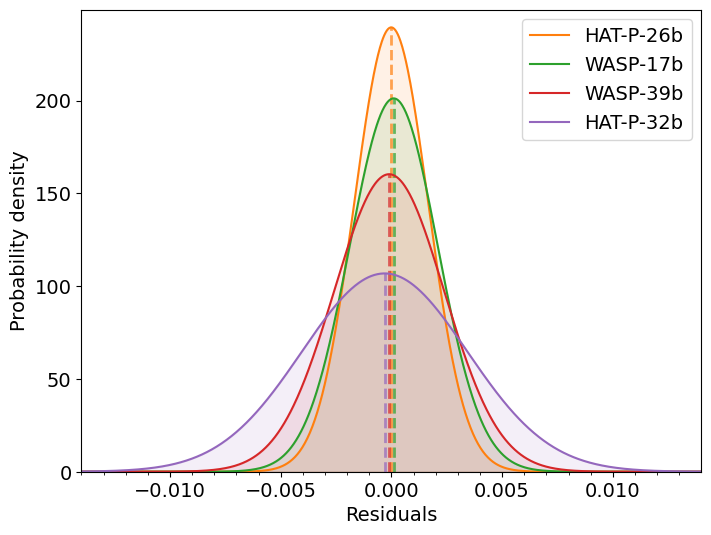

In [12]:
fontsize = 14

label_list = ["HAT-P-26b", "WASP-17b", "WASP-39b", "HAT-P-32b"]
mean_list = [HAT_P_26b_residuals_mean, WASP_17b_residuals_mean, WASP_39b_residuals_mean, HAT_P_32b_residuals_mean]
sigma_list = [HAT_P_26b_residuals_sigma, WASP_17b_residuals_sigma, WASP_39b_residuals_sigma, HAT_P_32b_residuals_sigma]
colour_list = ['#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
#['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']



fig, ax = plt.subplots(1, figsize=(8,6))
x = np.linspace(-0.014, 0.014, 1000)
for mean, sigma, colour, label in zip(mean_list, sigma_list, colour_list, label_list):
    ax.plot(x, stats.norm.pdf(x, mean, sigma), color=colour, label=label)
    ax.fill_between(x, stats.norm.pdf(x, mean, sigma), 0, color=colour, alpha=0.1)
    ax.vlines(x=mean, ymin=0, ymax=stats.norm.pdf(mean, mean, sigma), colors=colour, linestyles='--', alpha=0.7, linewidth=2)

ax.set_xlabel("Residuals", size=fontsize)
ax.set_ylabel("Probability density", size=fontsize)
ax.set_xlim(min(x), max(x))
ax.set_ylim(0, 249)

ax.xaxis.set_tick_params(labelsize=fontsize)
ax.yaxis.set_tick_params(labelsize=fontsize)

ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())

ax.legend(loc='upper right', prop={'size': fontsize})
plt.show()

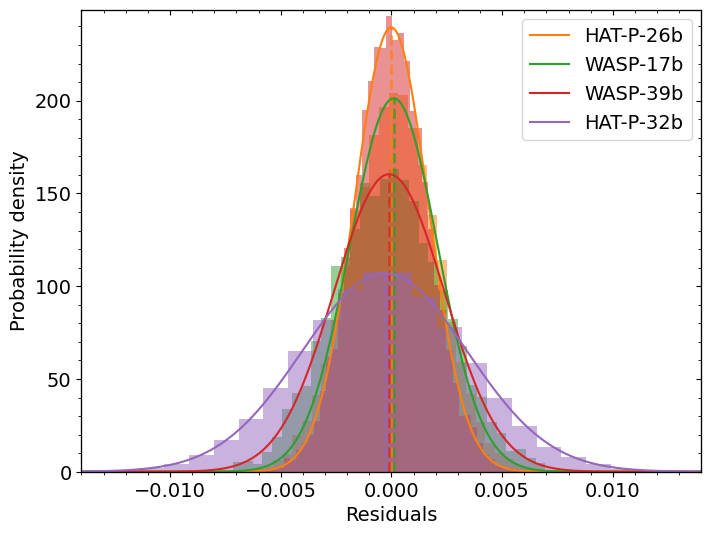

In [15]:
residuals_list = [WASP_17b_residuals, WASP_39b_residuals, HAT_P_26b_residuals, HAT_P_32b_residuals]
nbin = 50


fig, ax = plt.subplots(1, figsize=(8,6))
x = np.linspace(-0.014, 0.014, 1000)
for mean, sigma, colour, label, residuals in zip(mean_list, sigma_list, colour_list, label_list, residuals_list):
    ax.plot(x, stats.norm.pdf(x, mean, sigma), color=colour, label=label)
    ax.hist(residuals, density=True, bins=nbin, alpha=0.5, color=colour)
    ax.vlines(x=mean, ymin=0, ymax=stats.norm.pdf(mean, mean, sigma), colors=colour, linestyles='--', alpha=0.7, linewidth=2)



ax.set_xlim(min(x), max(x))

ax.set_xlabel("Residuals", size=fontsize)
ax.set_ylabel("Probability density", size=fontsize)
ax.set_xlim(min(x), max(x))
ax.set_ylim(0, 249)

ax.xaxis.set_tick_params(labelsize=fontsize)
ax.yaxis.set_tick_params(labelsize=fontsize)

# Mirror y
axy = ax.twinx()
axy.set_ylim(ax.get_ylim())
axy.get_yaxis().set_ticklabels([])
axy.tick_params(which="both", direction="in")


# Mirror x
axx = ax.twiny()
axx.set_xlim(ax.get_xlim())
axx.get_xaxis().set_ticklabels([])
axx.tick_params(which="both", direction="in")

ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
axx.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
axy.yaxis.set_minor_locator(ticker.AutoMinorLocator())

ax.legend(loc='upper right', prop={'size': fontsize})

plt.show()